# 確率ロボティクス課題
## 18C1015 岩井一輝
### 内容
価値反復の行動選択にε-greedy法のように閾値eを設定し, それを下回った場合には上下左右からランダムに行動を選択してその価値で更新するように変更した。また, 閾値eはスイープ数が増えるほどに小さくなり, greedy法で価値を更新するようになっている。

In [5]:
%matplotlib inline
import numpy as np

size = 3                                                    
costs = [[10,10,10],[10,10,10],[10,10,0]]      
goal = (2,2)   
actions = ["up","down","left","right"] # ロボットが選択できる行動のリスト

def cost(pos): # 指定した座標のコストを返す補助の関数
    p = [pos[0],pos[1]]
   #壁にぶつかったらそのまま 
    for i in [0,1]:  
        if p[i] < 0:        p[i] = 0
        if p[i] >= size: p[i] = size - 1
    
            
    return costs[p[0]][p[1]]

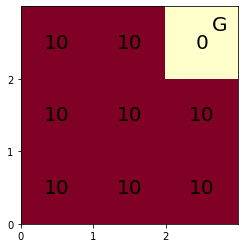

In [6]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches

def draw(mark_pos, action):  # mark_pos はマス目に目印の枠をつけるときに使います
    fig, ax = plt.subplots()
    mp = ax.pcolor(costs, cmap=plt.cm.YlOrRd,vmin=0,vmax=8)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
    
    for x in range(len(costs)):
        for y in range(len(costs[0])):
            plt.text(x+0.5,y+0.5,costs[x][y],ha = 'center', va = 'center', size=20)
            
    plt.text(goal[0]+0.75,goal[1]+0.75,"G",ha = 'center', va = 'center', size=20)
    
    if mark_pos != None:
        c = costs[mark_pos[0]][mark_pos[1]]
        plt.text(mark_pos[0]+0.5,mark_pos[1]+0.25,action,ha = 'center', va = 'center', size=20)
            
    plt.show()
    fig.clear()
    
draw(None,None)

In [7]:
def action_value(pos, action, goal):
    if pos == goal: return cost(pos)    # ゴールの価値は不変
    if   action == "up":return 1+cost((pos[0],pos[1]+1))
    elif action == "down": return 1+cost((pos[0],pos[1]-1))
    elif action == "left":    return 1+cost((pos[0]-1,pos[1]))
    elif action == "right":  return 1+cost((pos[0]+1,pos[1]))

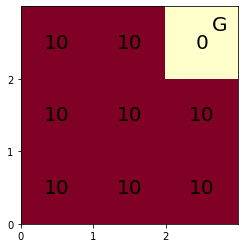

sweep 1


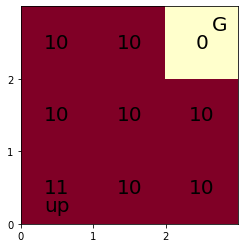

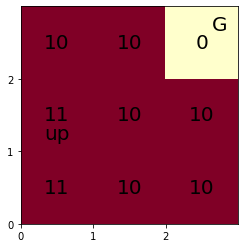

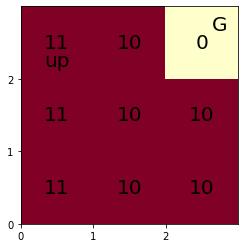

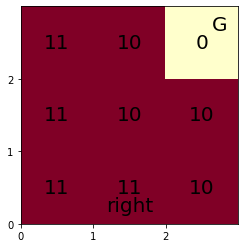

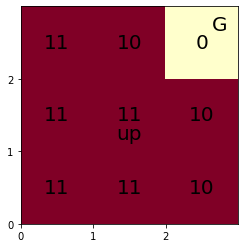

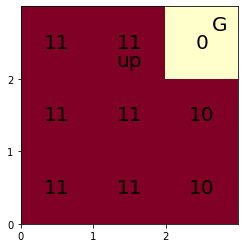

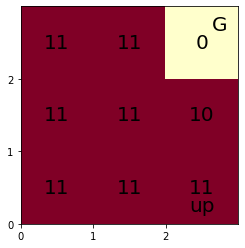

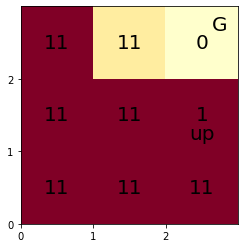

sweep 2


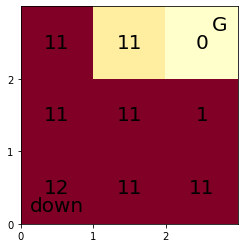

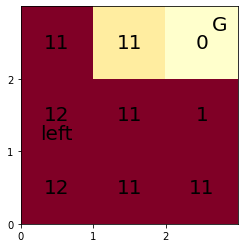

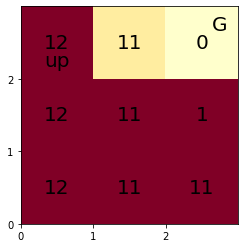

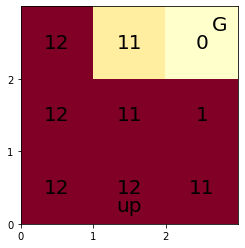

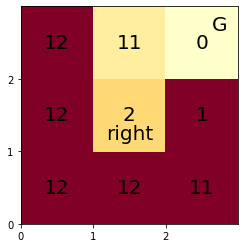

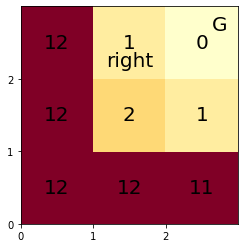

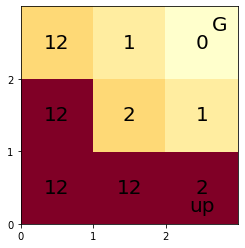

sweep 3


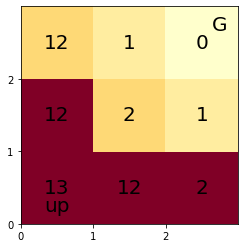

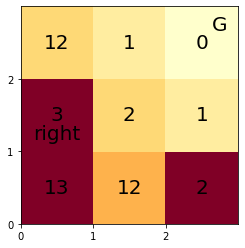

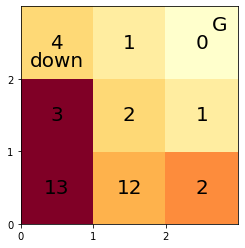

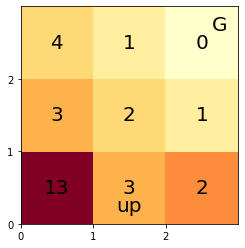

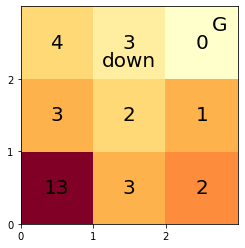

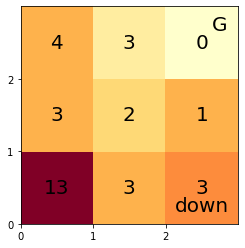

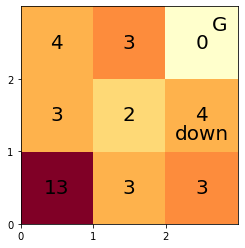

sweep 4


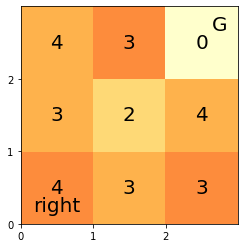

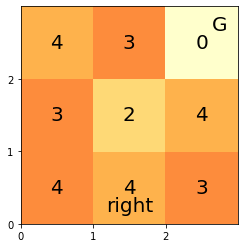

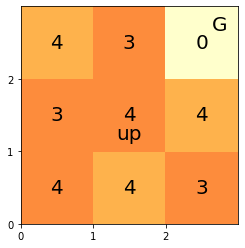

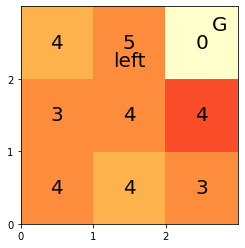

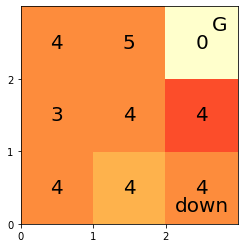

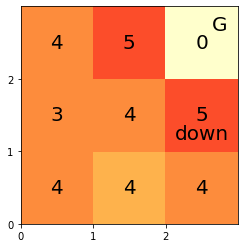

sweep 5


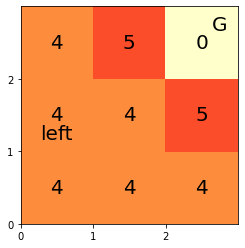

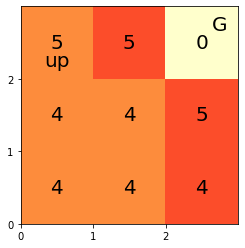

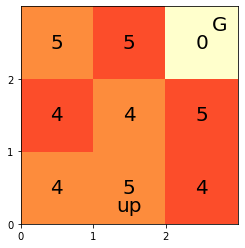

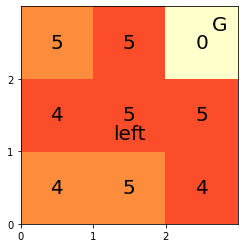

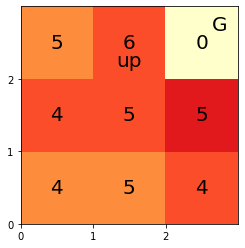

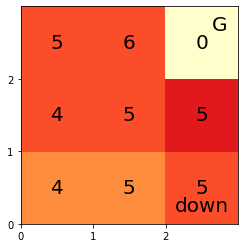

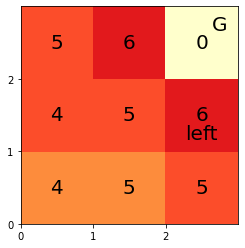

sweep 6


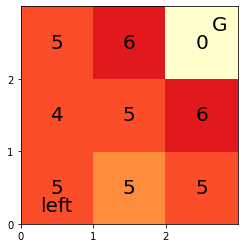

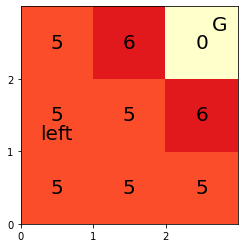

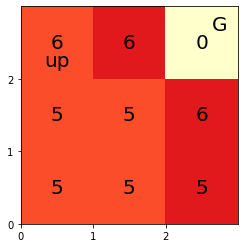

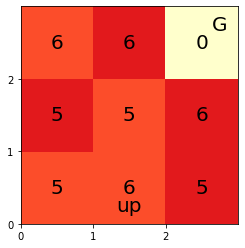

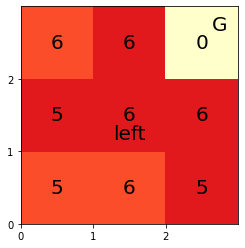

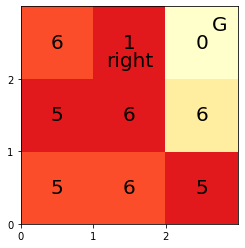

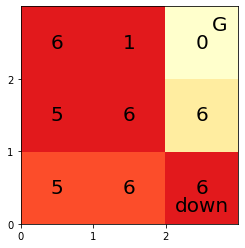

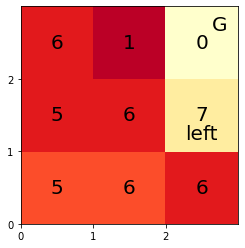

sweep 7


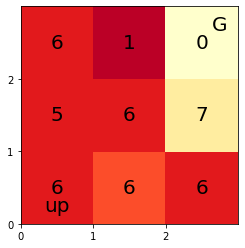

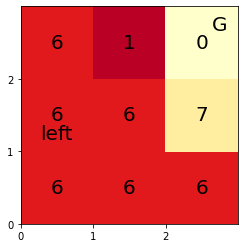

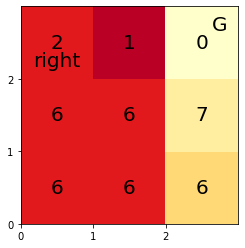

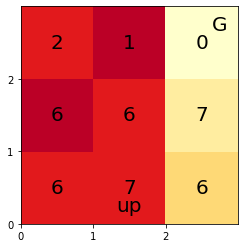

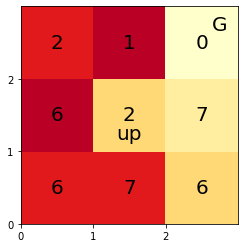

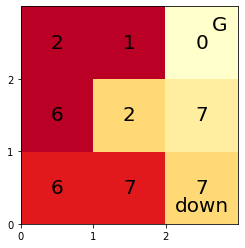

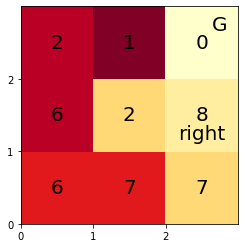

sweep 8


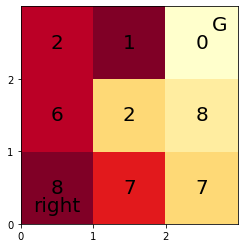

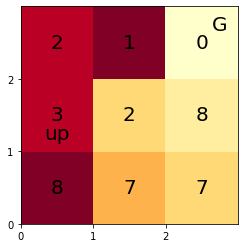

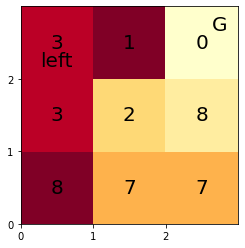

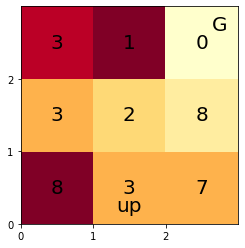

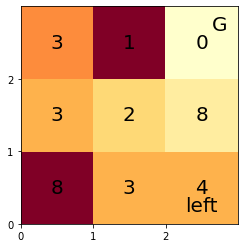

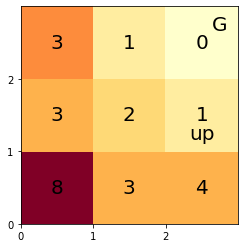

sweep 9


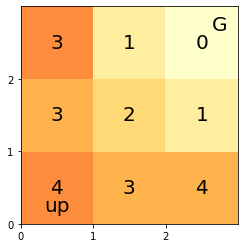

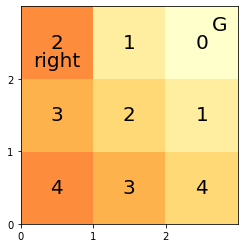

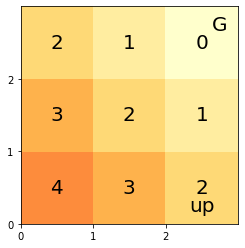

sweep 10


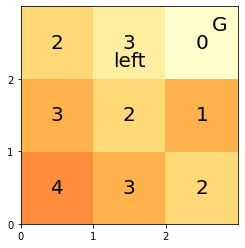

sweep 11


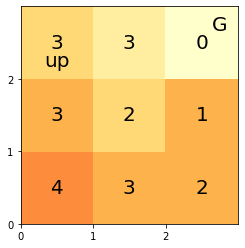

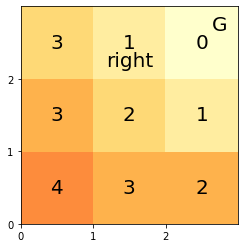

sweep 12


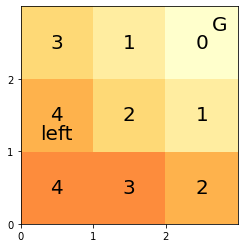

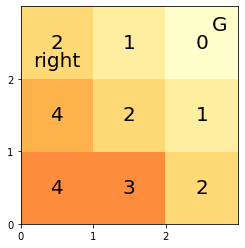

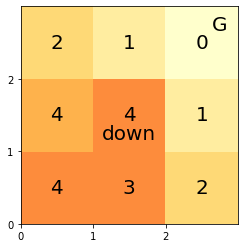

sweep 13


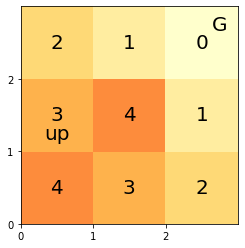

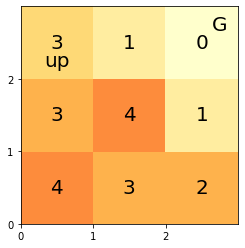

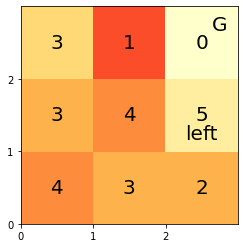

sweep 14


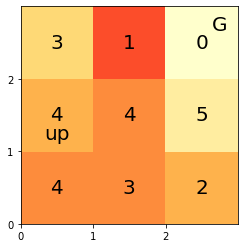

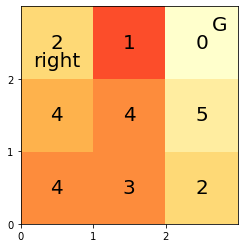

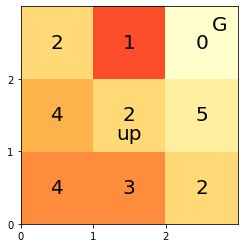

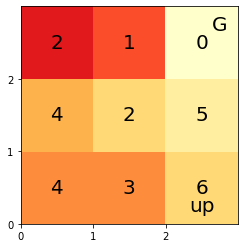

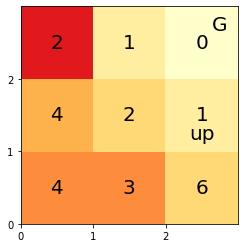

sweep 15


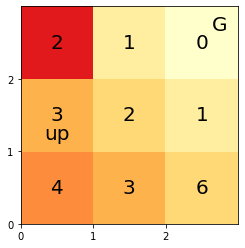

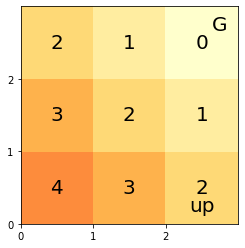

sweep 16


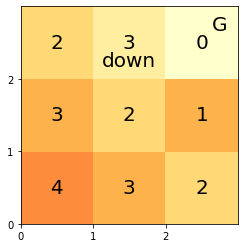

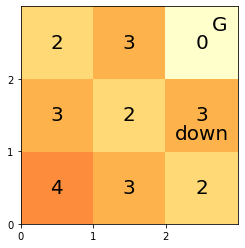

sweep 17


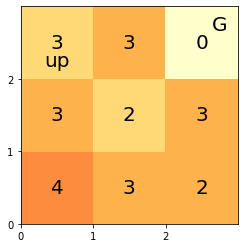

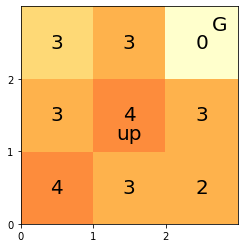

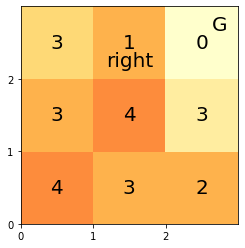

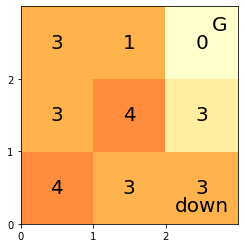

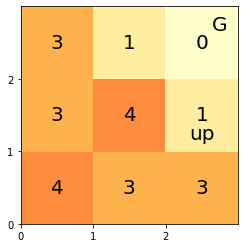

sweep 18


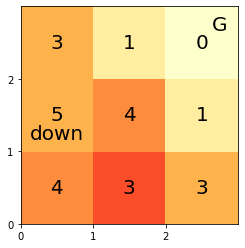

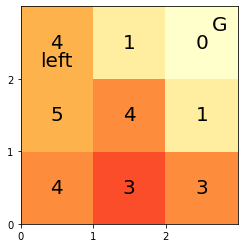

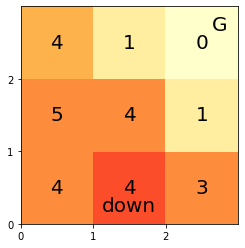

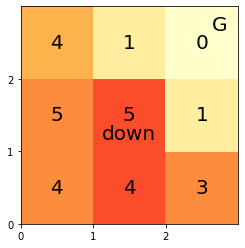

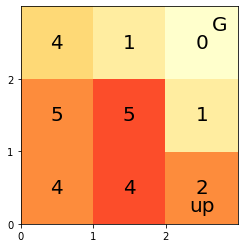

sweep 19


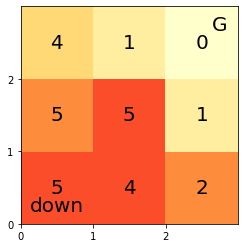

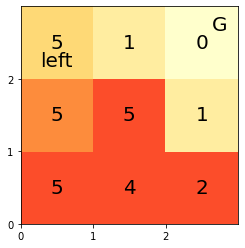

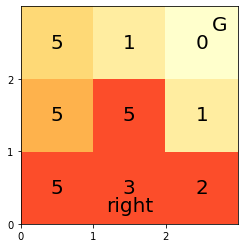

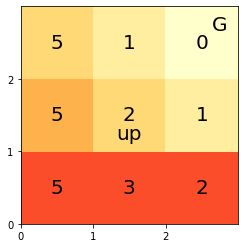

sweep 20


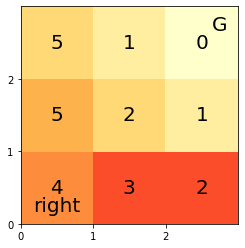

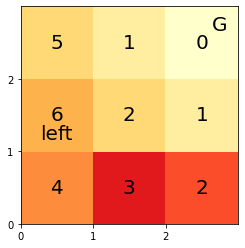

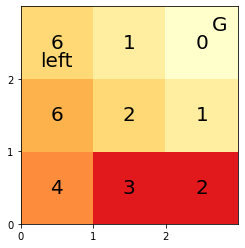

sweep 21


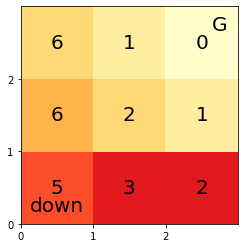

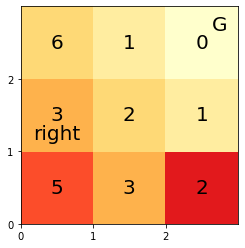

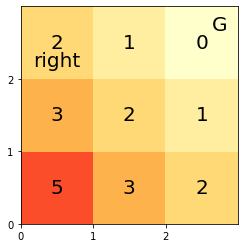

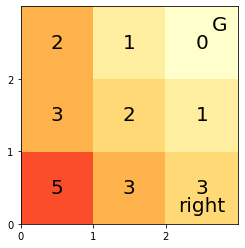

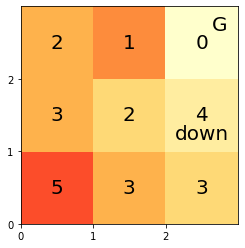

sweep 22


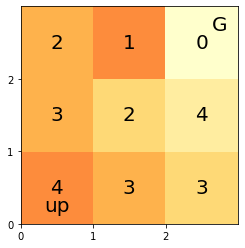

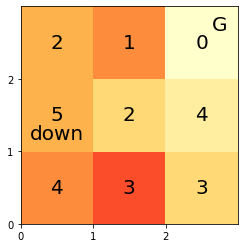

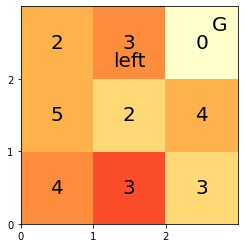

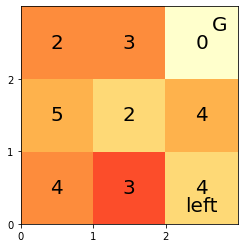

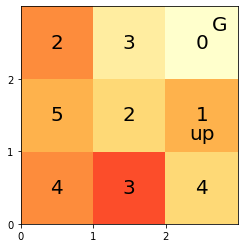

sweep 23


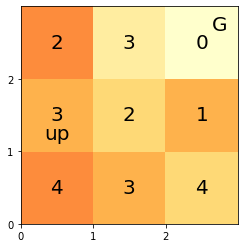

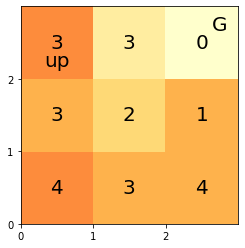

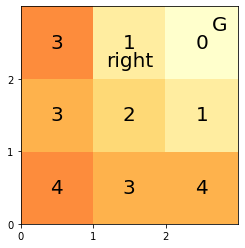

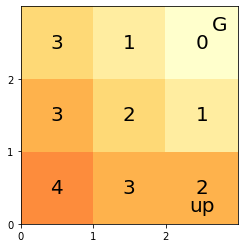

sweep 24


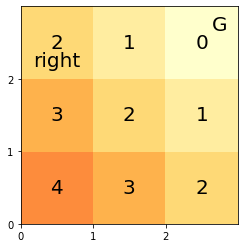

sweep 25


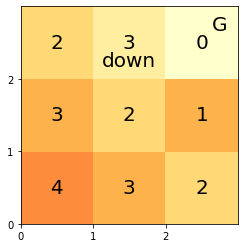

sweep 26


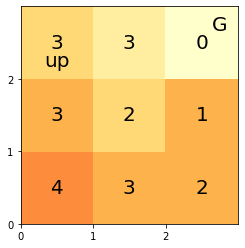

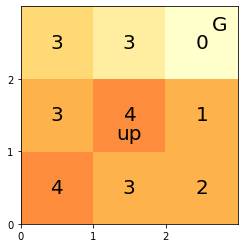

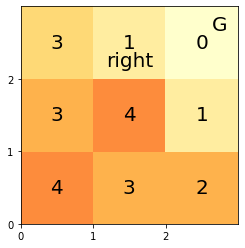

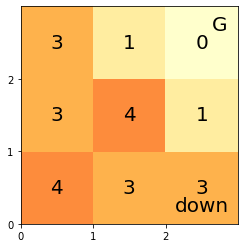

sweep 27


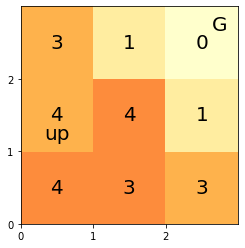

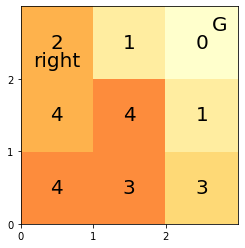

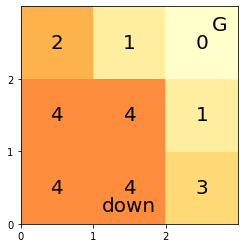

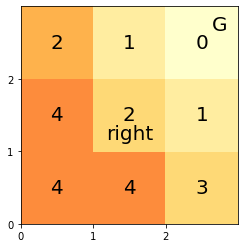

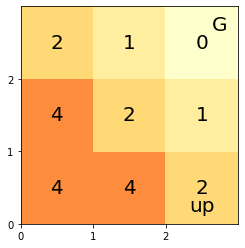

sweep 28


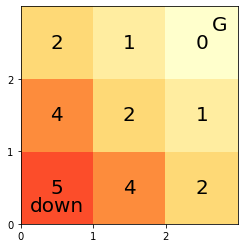

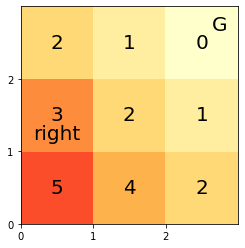

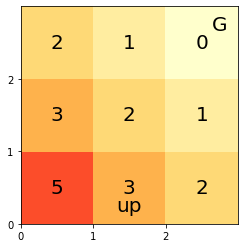

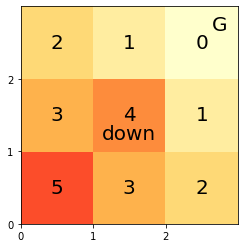

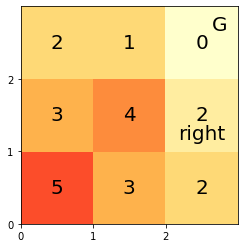

sweep 29


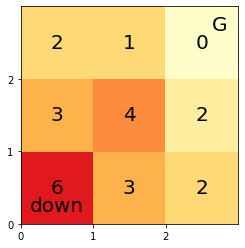

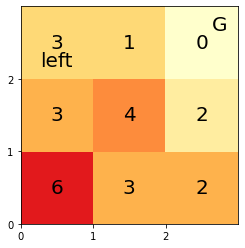

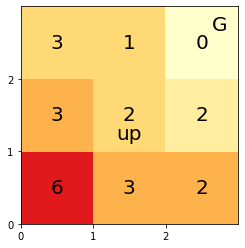

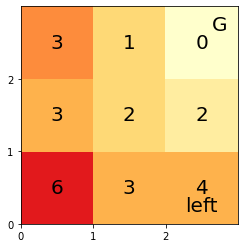

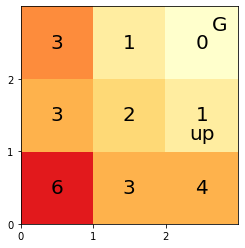

sweep 30


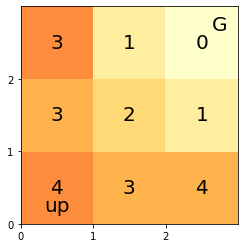

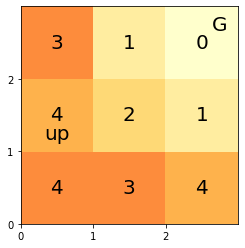

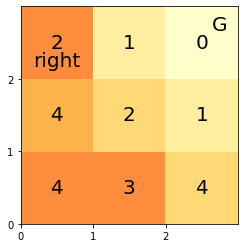

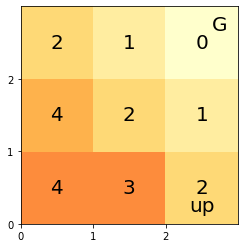

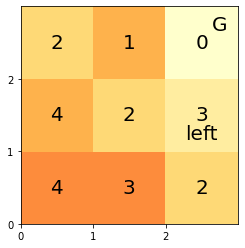

sweep 31


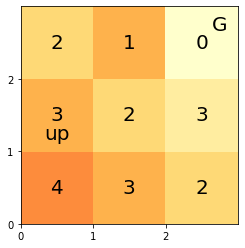

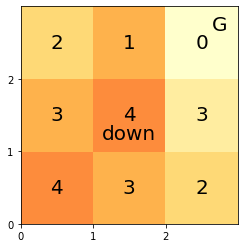

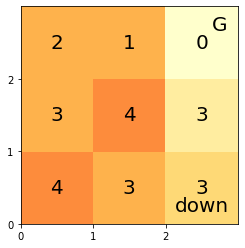

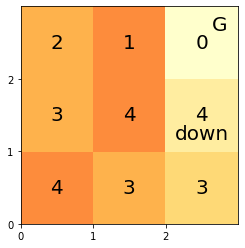

sweep 32


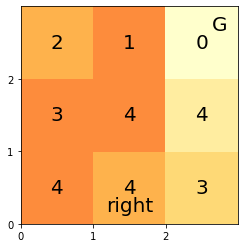

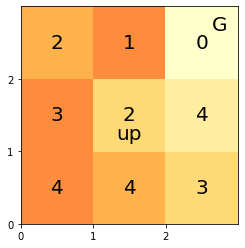

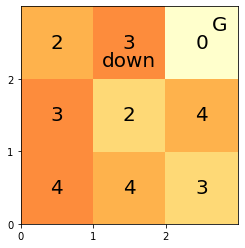

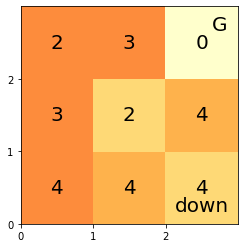

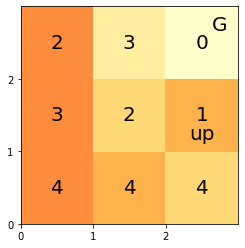

sweep 33


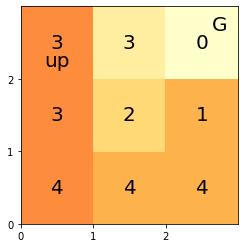

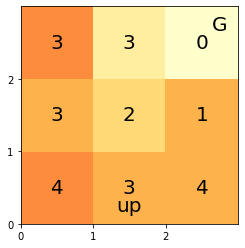

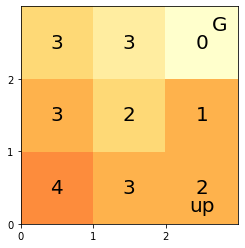

sweep 34


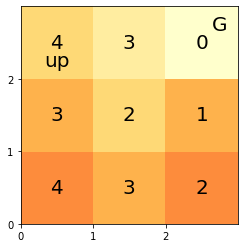

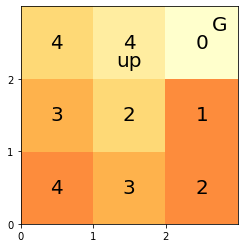

sweep 35


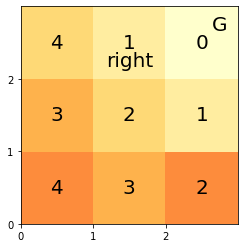

sweep 36


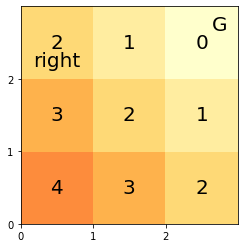

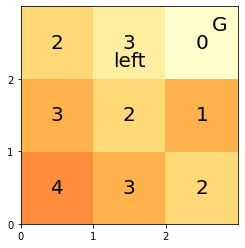

sweep 37


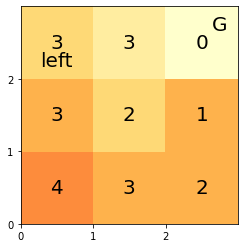

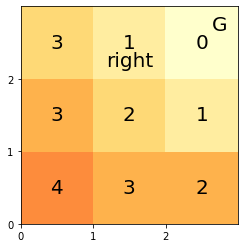

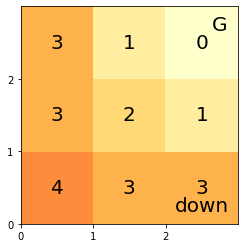

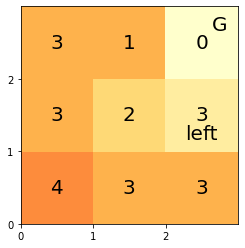

sweep 38


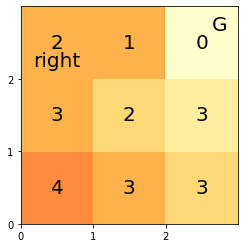

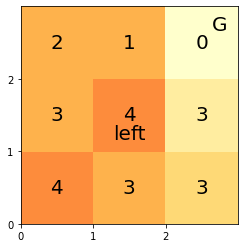

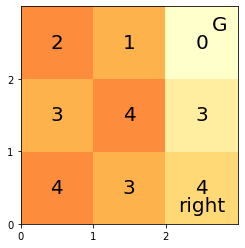

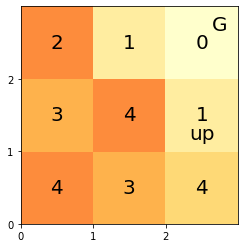

sweep 39


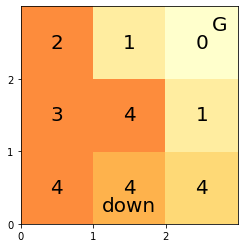

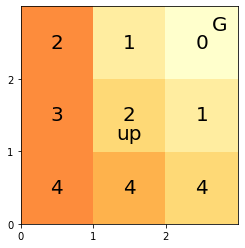

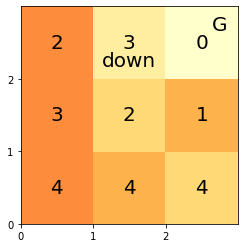

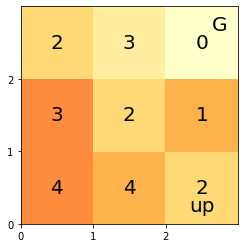

sweep 40


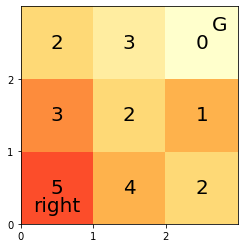

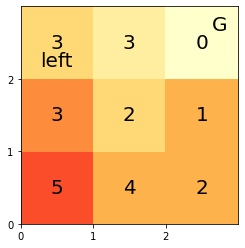

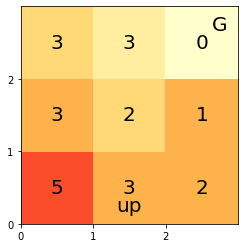

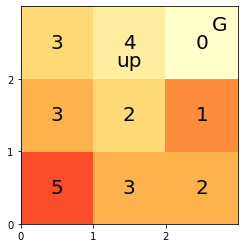

sweep 41


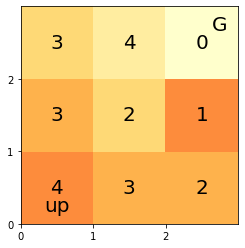

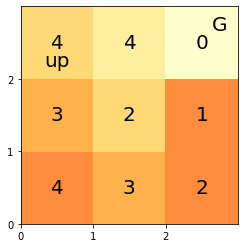

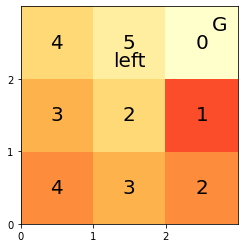

sweep 42


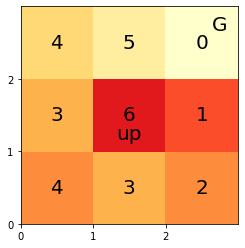

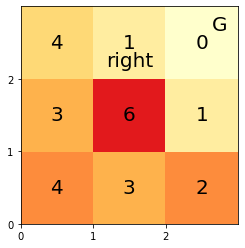

sweep 43


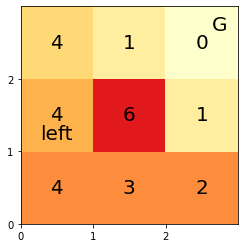

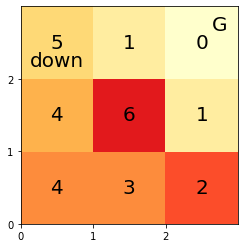

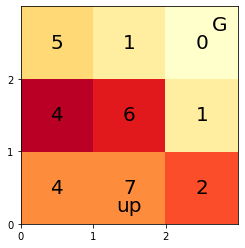

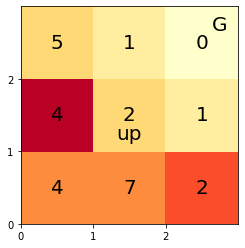

sweep 44


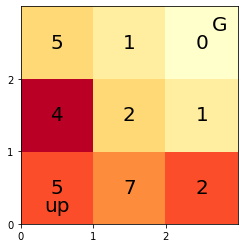

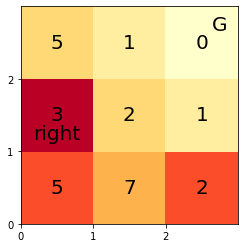

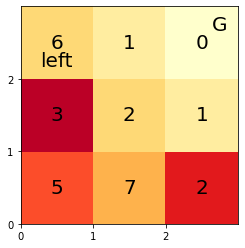

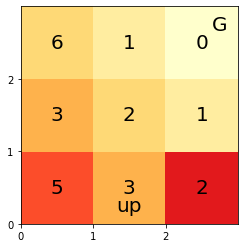

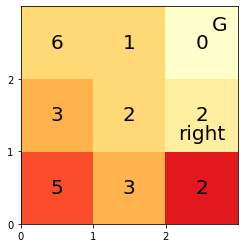

sweep 45


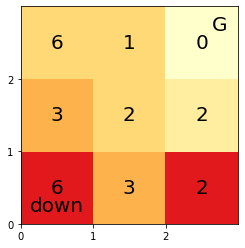

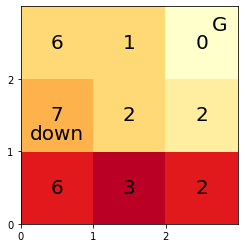

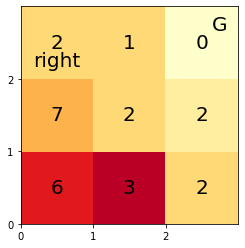

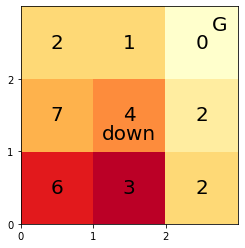

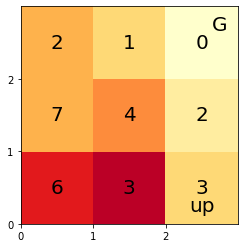

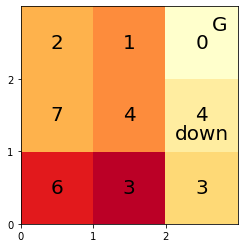

sweep 46


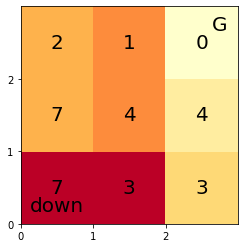

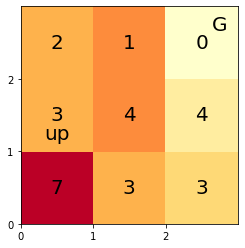

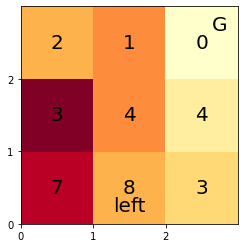

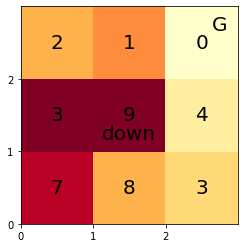

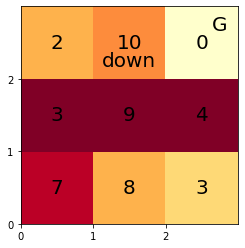

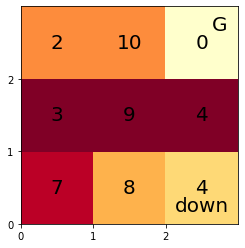

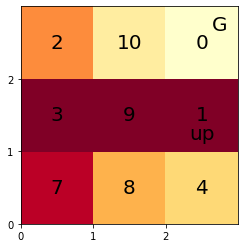

sweep 47


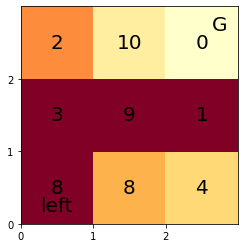

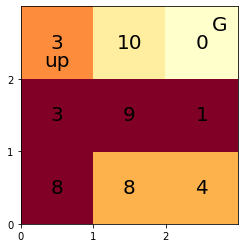

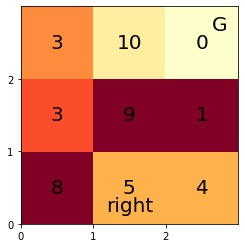

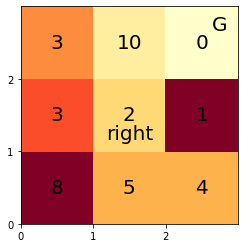

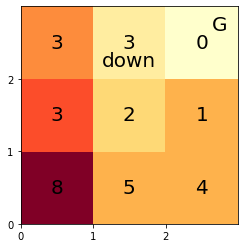

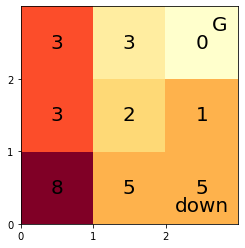

sweep 48


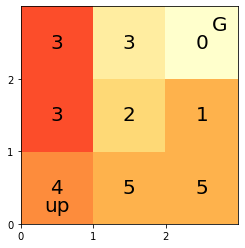

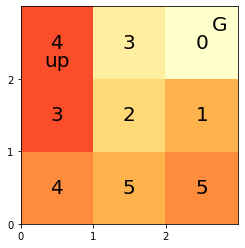

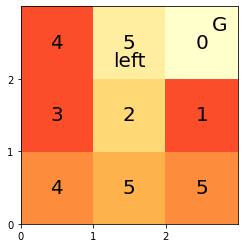

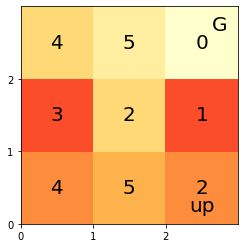

sweep 49


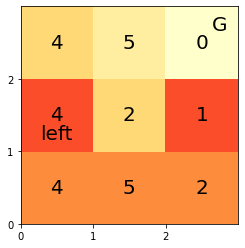

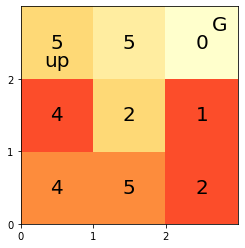

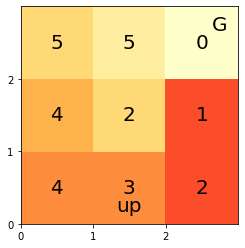

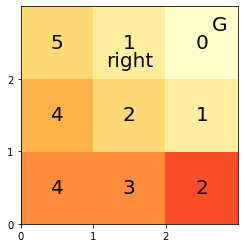

sweep 50


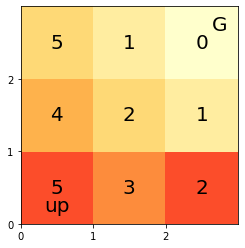

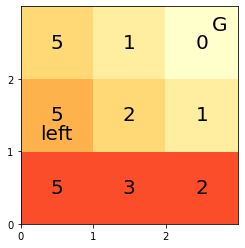

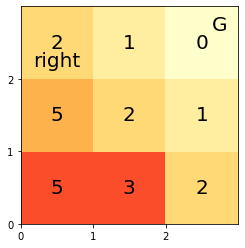

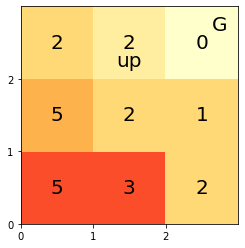

sweep 51


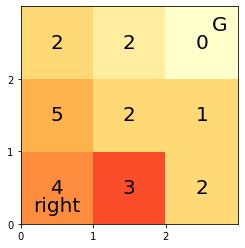

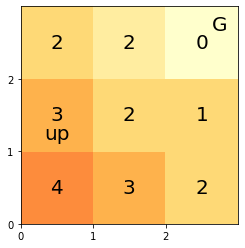

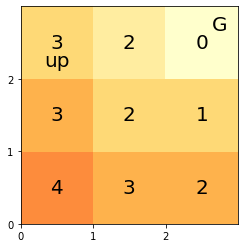

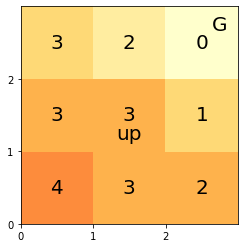

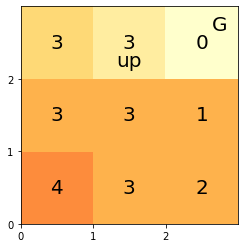

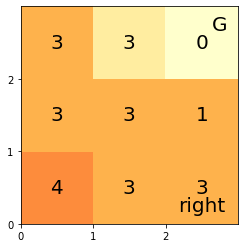

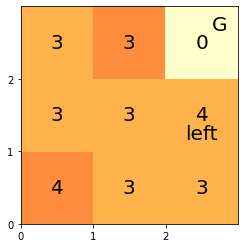

sweep 52


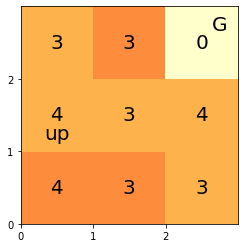

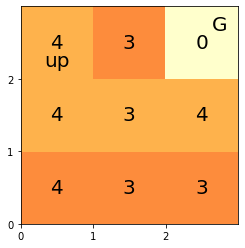

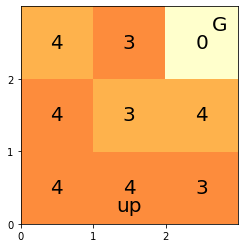

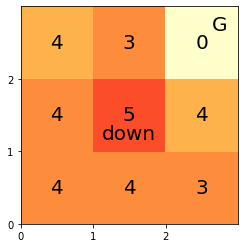

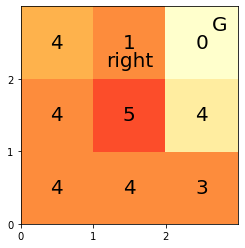

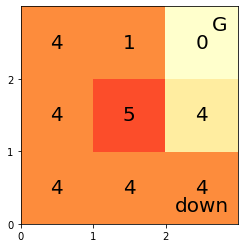

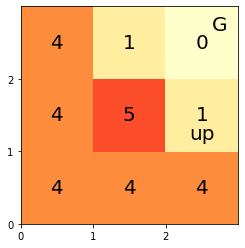

sweep 53


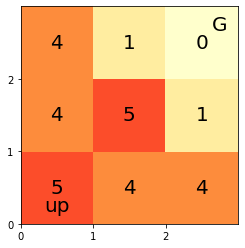

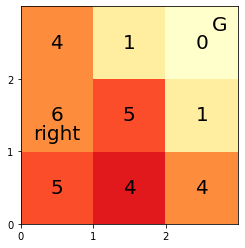

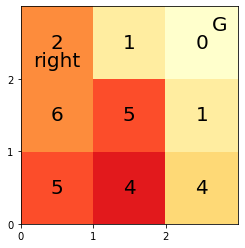

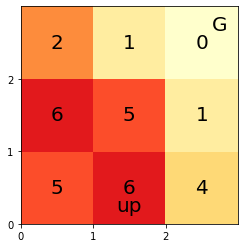

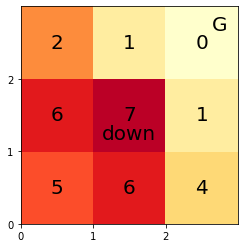

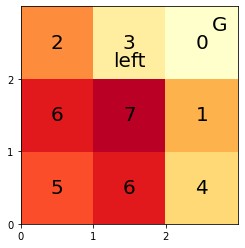

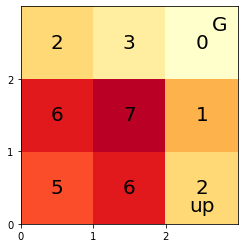

sweep 54


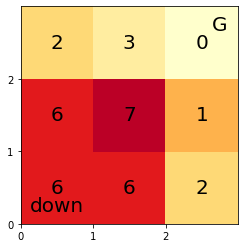

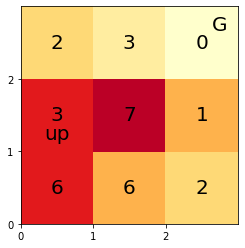

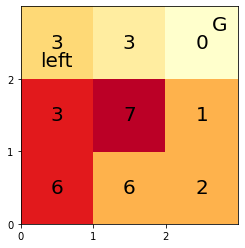

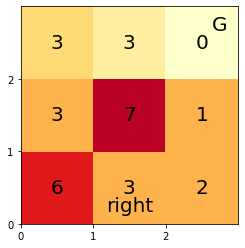

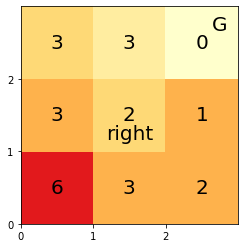

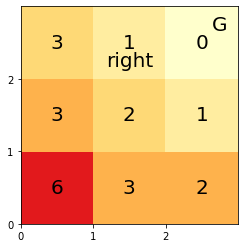

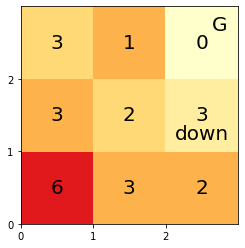

sweep 55


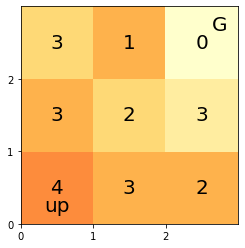

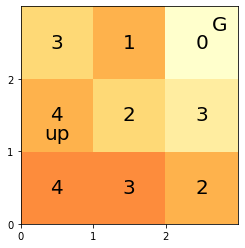

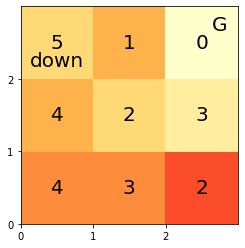

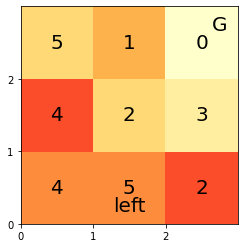

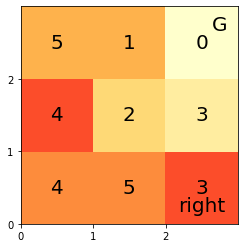

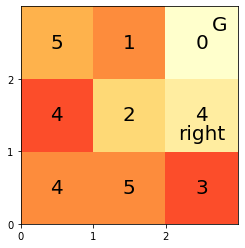

sweep 56


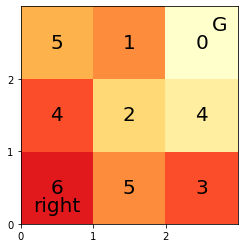

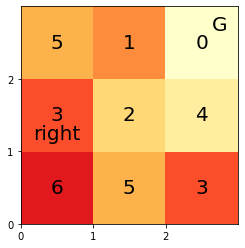

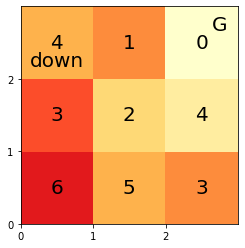

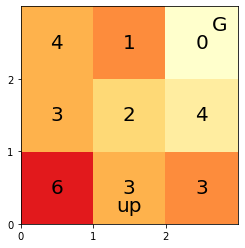

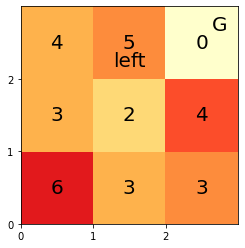

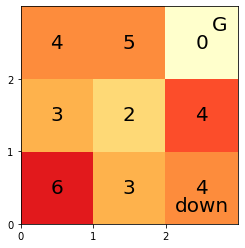

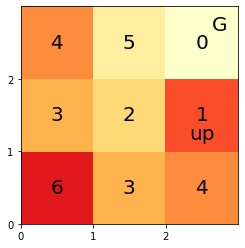

sweep 57


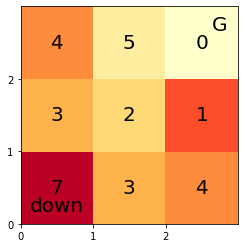

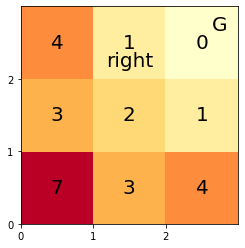

sweep 58


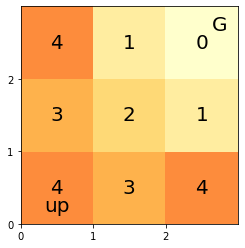

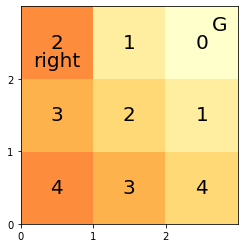

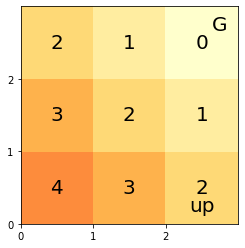

sweep 59


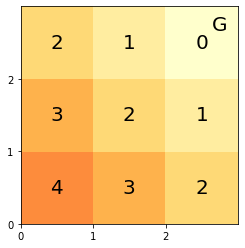

In [9]:
import random
def sweep():
    changed = False
    
    for x in range(size):
        for y in range(size):
            min_cost = 100
            min_action = None
            e = 0.3
            n = random.uniform(0,1)
            for a in actions:
                if n < e:
                    min_action = random.choice(actions)
                    min_cost = action_value((x,y), min_action, goal)
                    e = n
                    break
                else:
                    c = action_value((x,y), a, goal)
                    if c < min_cost:
                        min_cost = c
                        min_action = a
            
            if costs[x][y] != min_cost:
                costs[x][y] = min_cost
                draw((x,y),min_action)
                changed = True
            
    return changed

draw(None,None)
changed = True
n = 1
while changed:
    print("sweep",n)
    changed = sweep()
    n = n + 1
    
draw(None,None)